# Eight Queens
To illustrate the 8 Queens problem we first create a class to represent a possible boardstate and all the possible successors to this boardstate. The successor to a board state is every other boardstate that can be reached by moving one Queen to another square in the same column that it previously resided in. Each Queen is marked `×` if she is attacked by at least one other Queen and `♛` if she is not.

In [1]:
from random import randrange, uniform, choice, seed

class Board:
    def __init__(self, state=None):
        self.state = state if state is not None else ''.join(str(randrange(8)) for _ in range(8))
        self.util = 28 - sum(self.targets(int(self[i]), i, int(self[j]), j) 
                             for i in range(8) for j in range(8) if i != j)//2
                
    @staticmethod
    def targets(ax, ay, bx, by):
        return (ax == bx or ay == by or abs(ax - bx) == abs(ay - by)) and (ax, ay) != (bx, by)
    
    def __add__(self, other): # Defines Reproduction
        crossover = randrange(len(self.state))
        return Board(self[:crossover] + other[crossover:])
    
    def __getitem__(self, idx):
        return self.state[idx]
    
    def attacked(self, idx):
        return any(self.targets(*idx, int(self[i]), i) for i in range(8))
    
    def __repr__(self):
        return f'Board[state={self.state}|util={self.util}]'
    
    def __len__(self):
        return len(self.state)
    
    def __str__(self):
        l = ['┌───┬───┬───┬───┬───┬───┬───┬───┐']
        for i in range(8):
            l.append('│ ' + ' │ '.join(('×' if self.attacked((int(self[j]), j)) else '♛') 
                                       if self[j] == str(i) else ' ' for j in range(8)) + ' │')
            if i < 7:
                l.append('├───┼───┼───┼───┼───┼───┼───┼───┤')
        l.append('└───┴───┴───┴───┴───┴───┴───┴───┘')
        return '\n'.join(l)
    
    def successors(self):
        for i in range(8):
            for j in range(8):
                if j != int(self[i]):
                    yield Board(self[:i] + str(j) + self[i+1:])
    
    def mutation(self):
        idx = randrange(len(self))
        gene = int(self[idx])
        mutation = str(choice(list(range(gene)) + list(range(gene+1, len(self)))))
        return Board(self[:idx] + mutation + self[idx+1:])
    


print(Board('02467531'))
print(Board('13572064'))

┌───┬───┬───┬───┬───┬───┬───┬───┐
│ × │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ ♛ │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │ × │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │ ♛ │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │ × │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │ × │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │ × │   │   │   │
└───┴───┴───┴───┴───┴───┴───┴───┘
┌───┬───┬───┬───┬───┬───┬───┬───┐
│   │   │   │   │   │ ♛ │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ ♛ │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │ ♛ │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ ♛ │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │ ♛ │   │   │   │   │   │
├───┼───┼───┼─

### Genetic Algorithm

We use the genetic algorithm to simulate evolution. Each individual is picked for reproduction with a probability relative to its fitness. The Reproduction ist already defined in the `entity_class` as the `+` operator. The child will mutate with a small probability.

Board[state=16470534|util=25]
Board[state=20413637|util=25]
Board[state=05117736|util=25]
Board[state=16470535|util=26]
Board[state=70652074|util=25]
Board[state=70612064|util=25]
Board[state=71660045|util=25]
Board[state=70612564|util=25]
Board[state=70612574|util=26]
Board[state=20617164|util=25]
┌───┬───┬───┬───┬───┬───┬───┬───┐
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │ × │   │ × │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ ♛ │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ × │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │ × │   │   │   │ × │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │ × │   │   │   │
└───┴───┴───┴───┴───┴───┴───┴───┘
Board[state=20617163|util=25]
Board[state=74612063|util=25]
Board[state=70261673|util=25]
Board[state=26170364|util=27]
Bo

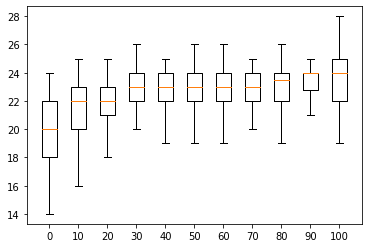

┌───┬───┬───┬───┬───┬───┬───┬───┐
│   │   │   │   │ ♛ │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │ ♛ │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ ♛ │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │ ♛ │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ ♛ │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │ ♛ │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │ ♛ │   │   │   │   │
└───┴───┴───┴───┴───┴───┴───┴───┘


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from math import ceil


seed(1)


class Evolution:
    def __init__(self, entity_class, size, fitness, goal):
        self.fitness = fitness
        self.goal = goal
        self.population = sorted([entity_class() for _ in range(size)], key=self.fitness, reverse=True)
        self.update()
    
    def update(self):
        self.total_fitness = sum(self.fitness(entity) for entity in self.population)
    
    def __iter__(self):
        for entity in self.population:
            yield entity
    
    def __getitem__(self, idx):
        return self.population[idx]
    
    def select(self):
        pivot = uniform(0, 1) * self.total_fitness
        pointer = 0
        for i, entity in enumerate(self):
            pointer += self.fitness(entity)
            if pointer >= pivot:
                return self[i-1]
        return self[-1]
    
    def mutate(self, entity, mutation_probability):
        if uniform(0, 1) < mutation_probability:
            return entity.mutation()
        else:
            return entity

    def __call__(self, epochs, mutation_probability=0.2):
        number_of_boxplots = 10
        boxplot_width = 5
        for epoch in range(epochs):
            if (epoch % (epochs//number_of_boxplots)) == 0:
                try:
                    print(best)
                except:
                    pass
                plt.boxplot([self.fitness(x) for x in self.population], 
                            positions=[epoch], widths=boxplot_width, showfliers=False)
            population = []
            for _ in range(len(self.population)):
                parent_one = self.select()
                parent_two = self.select()
                child = parent_one + parent_two
                child = self.mutate(child, mutation_probability)
                population.append(child)
            self.population = sorted(population, key=self.fitness, reverse=True)
            self.update()
            best = self.population[0]
            print(repr(best))
            if self.goal(best):
                break
        plt.boxplot([self.fitness(x) for x in self.population], 
                    positions=[ceil(epoch/number_of_boxplots)*number_of_boxplots], widths=boxplot_width, showfliers=False)
        plt.show()
        return best
                

pool = Evolution(entity_class=Board, size=100, goal=lambda x: x.util == 28, fitness=lambda x: x.util)
darwins_favorite = pool(100, mutation_probability=0.02)
print(darwins_favorite)